In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error, median_absolute_error, max_error
from tabulate import tabulate


In [2]:
def TabelaAvaliacaoRegressao(valor_real,predicoes):     
     d = [["R²",round(r2_score(val_y,predictions),2)],
          ["Erro Absoluto Médio",round(mean_absolute_error(val_y, predictions),2)],
          ["MSE(Erro Quadrático Médio)",mean_squared_error(val_y, predictions)],
          ["MSLE(Logaritmo do Erro Quadrático Médio)",mean_squared_log_error(val_y, predictions)],
          ["MAPE(Percentual do Erro Médio Absoluto)",mean_absolute_percentage_error(val_y, predictions)*100],
          ["MedAE(mediana do erro absoluto)",median_absolute_error(val_y, predictions)],
          ["Maior Erro",round(max_error(val_y, predictions),2)]]
     print(tabulate(d))

In [41]:
base = pd.read_csv("C:/Users/rodri/OneDrive/Área de Trabalho/PUCMG/Sistemas Inteligentes/Projeto Sistemas Inteligentes/ppl-cd-pcd-sist-int-2022-2-compartilhamento-de-bicicletas/src/data/norm.csv")
del base['Unnamed: 0']
del base['id']
y = base["value"]
del base["value"]

X = base

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)


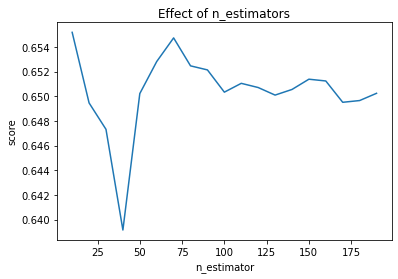

optimal n estimators: 10
----------------------------------------  -------------
R²                                          0.65
Erro Absoluto Médio                         4.21077e+06
MSE(Erro Quadrático Médio)                  3.49325e+13
MSLE(Logaritmo do Erro Quadrático Médio)    0.988728
MAPE(Percentual do Erro Médio Absoluto)   222.154
MedAE(mediana do erro absoluto)             2.60454e+06
Maior Erro                                  1.98524e+07
----------------------------------------  -------------
0.15 age
0.03 height
0.04 weight
0.02 position
0.01 draft_round
0.59 pts
0.11 ast
0.06 reb


In [5]:
base = pd.read_csv("C:/Users/rodri/OneDrive/Área de Trabalho/PUCMG/Sistemas Inteligentes/Projeto Sistemas Inteligentes/ppl-cd-pcd-sist-int-2022-2-compartilhamento-de-bicicletas/src/data/norm.csv")
del base['Unnamed: 0']
del base['id']
y = base["value"]
del base["value"]

X = base

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

model = RandomForestRegressor(random_state=1, n_estimators=10)
model.fit(train_X, train_y)
#print(base.head(40))

estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(train_X, train_y)
    scores.append(model.score(val_X, val_y))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
plt.show()

best_estimator = np.array(scores).argmax()
best_estimator = estimators[best_estimator]

print("optimal n estimators:", best_estimator)

predictions = model.predict(val_X)
accuracy = model.score(val_X, val_y)

TabelaAvaliacaoRegressao(val_y,predictions)

#Verificando a importância dos atributos
for score, name in zip(model.feature_importances_, base.columns):
   print(round(score, 2), name)


## RESULTADOS

## Métricas Utilizadas para Avaliar Modelos de Regressão

O _*sklearn.metrics*_ implementa várias funções de perda, pontuação e utilidade para medir o desempenho da regressão. Abaixo é apresentado um breve resumo das métricas que serão utilizadas para avaliar a regressão

 A _r2_scorefunction_ calcula o coeficiente de determinação , geralmente denotado como:


$$

R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}

$$

Onde $\hat y$ é o valor predito e $\bar y$ é o valor médio das amostras $\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$  

O $R^2$ fornece uma indicação da qualidade do ajuste e, portanto, uma medida de quão bem as amostras não vistas provavelmente serão previstas pelo modelo. A melhor pontuação possível é 1,0 e pode ser negativa (porque o modelo pode ser arbitrariamente pior).

 
Outra métrica muito importante é a  _**MAE**_ (_mean absolut error_):

 $$
 \text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$$

O _MAE_ é simplesmente, como o nome sugere, a média dos erros absolutos. O erro absoluto é o valor absoluto da diferença entre o valor previsto e o valor real. O erro absoluto médio mede a precisão de variáveis contínuas. O _MAE_ nos diz o tamanho médio do erro que podemos esperar da previsão.


O _**MSE**_ (_mean squared error_) erro quadrado médio:

$$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2$$

Nos informa o quão perto uma linha de regressão está de um conjunto de pontos de dados. Um MSE maior indica que os pontos de dados estão amplamente dispersos em torno da média, enquanto um MSE menor sugere o contrário. Um MSE menor é preferido porque indica que seus pontos estão mais próximos da média. Ele reflete a distribuição centralizada de seus valores de dados, o fato de não ser distorcido e, o mais importante, ter menos erros (erros medidos pela dispersão dos pontos de dados de sua média).

Menor o MSE => Menor o erro => Melhor o estimador.


O _**MSLE**_ (_mean squared log error_) logaritmo do erro quadrado médio:

$$\text{MSLE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (\log_e (1 + y_i) - \log_e (1 + \hat{y}_i) )^2$$

Tem sido uma métrica muito importante apresentada nos modelos de ciência de dados. O seu valor não sofre grandes variações com a presença de outliers, devido à função log imbutida em sua fórmula. Devido as propriedades desta função, o $(\log_e (1 + y_i) - \log_e (1 + \hat{y}_i))$ representa uma  fração dos erros. Ou seja, a escala em que se encontra não é significante, mesmo para valores altos, sempre estaremos no intervalo de 0 e 1. Por último e mais importante, essa métrica sobrecarrega o erro de previsão quando este está abaixo do valor real. Em outras palavras, caso o salário real do jogador for menor do que o valor previsto, o MSLE será pequeno.


O _**MAPE**_ (_mean absolute percentage error_):

$$\text{MAPE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \frac{{}\left| y_i - \hat{y}_i \right|}{\max(\epsilon, \left| y_i \right|)}$$

Onde o $\epsilon$ em ${\max(\epsilon, \left| y_i \right|)}$ ocorre para evitar resultados indefinidos quando o $\text y$ é zero.

Este é um dos indicadores mais usados para verificar a acurácia da previsão, por ser de fácil compreensão e interpretação. Essa métrica trata do erro absoluto divido pelo real assim você tem a distância em % do predito em relação ao realizado.


_**MedAE**_ (_median absolute error_):

$$\text{MedAE}(y, \hat{y}) = \text{median}(\mid y_1 - \hat{y}_1 \mid, \ldots, \mid y_n - \hat{y}_n \mid)$$

A melhor maneira de entender o _**MedAE**_ é entender como ele é calculado. Primeiro, é calculado o valor absoluto da distância entre o valor predito e o real, para todas as amostras e então é retirada a mediana desse conjunto de valores. Assim, essa métrica nos retorna o percentil 50 dos erros, desta maneira, conseguimos observar qual a distribuição dos erros 50% acima e 50% abaixo.


A função _**max_error**_ calcula o erro residual máximo , uma métrica que captura o erro de pior caso entre o valor previsto e o valor verdadeiro.

$$\text{Max Error}(y, \hat{y}) = \max(| y_i - \hat{y}_i |)$$





### Resultados obtidos com o Random Forest Regressor 



* Tabela com o valor das métricas utilizadas 

 R² | Erro Absoluto Médio | Erro Quadrático Médio | MSLE(Logaritmo do Erro Quadrático Médio) | MAPE(Percentual do Erro Médio Absoluto) | MedAE(mediana do erro absoluto) | Erro Máximo |
--- |--- |--- |--- |--- |--- |--- |
 0.65| 4.21077e+06 | 3.49325e+13 | 0.988728 | 2.22154 | 2.60454e+06 | 1.98524e+07 |



* Tabela com o peso atribuido pelo modelo aos atributos

age | height | weight | position | draft_round | pts | ast | reb |
--- |--- |--- |--- |--- |--- |--- |--- |
0.15 | 0.03 | 0.04 | 0.02 | 0.01 | 0.59 | 0.11 | 0.06 |



### Interpretação do Random Forest Regressor

O modelo obteve R² de 65%, esta é a base para os modelos de regressão pois demonstra a qualidade do ajuste realizado. 
Neste caso, em 100 amostras iriamos conseguir prever ```65%```.

Dentro desses 35% de erro, temos que, em média, de acordo com o MAE, o valor do salário esta defasado de, aproximadamente, ```US$421.077,00```. Essa defasagem pode ser considerada grande, pois o MSE obtido indica  que os valores estão muito dispersos em relação à media. Este dado pode ser corroborado pelo MAPE de ```220%```. 

Dentro do conjunto de avaliações, o nosso modelo está retornando, em média, um ```valor de predição abaixo do salário real que o jogador deveria ganhar```. Informação constatada pelo MSLE.Esta métrica é muito importante, pois, se tratando de dinheiro gasto, teremos uma folga no orçamento caso o regressor seja utilizado.

Por último, podemos ver que a mediana dos erros está em conformidade com os valores já apresentados. o MedAE é de ```US$260.454,00``` doláres,aproximadamente. Ou seja, 50% dos erros estão abaixo desse valor e 50% estão acima, sendo que, o erro máximo foi de ```US$1.985.240,00```,aproximadamente.



### AVALIAÇÃO DO MODELO MLPRegressor

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error, median_absolute_error, max_error
from tabulate import tabulate

base = pd.read_csv("C:/Users/rodri/OneDrive/Área de Trabalho/PUCMG/Sistemas Inteligentes/Projeto Sistemas Inteligentes/ppl-cd-pcd-sist-int-2022-2-compartilhamento-de-bicicletas/src/data/norm.csv")

del base['Unnamed: 0']
del base['id']
y = base["value"]
del base["value"]

X = base

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)


regr = MLPRegressor(
    
    random_state=1,
    tol = 0.0000001,
    learning_rate_init = 0.1,
    hidden_layer_sizes=(70)).fit(train_X, train_y)

predictions = regr.predict(val_X)

#Verificando a importância dos atributos
#for score, name in zip(regr.feature_importances_, base.columns):
#   print(round(score, 2), name)

TabelaAvaliacaoRegressao(val_y,predictions)   



----------------------------------------  -------------
R²                                         -0.65
Erro Absoluto Médio                         8.21302e+06
MSE(Erro Quadrático Médio)                  1.64316e+14
MSLE(Logaritmo do Erro Quadrático Médio)    3.90701
MAPE(Percentual do Erro Médio Absoluto)   107.015
MedAE(mediana do erro absoluto)             4.19946e+06
Maior Erro                                  3.99455e+07
----------------------------------------  -------------


c:\Users\rodri\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Resultados obtidos com o MLP Regressor

* Tabela com o valor das métricas utilizadas:

 R² | MAE (Erro Absoluto Médio) | MSE (Erro Quadrático Médio) | MSLE(Logaritmo do Erro Quadrático Médio) | MAPE(Percentual do Erro Médio Absoluto) | MedAE (Mediana do Erro Absoluto) | Erro Máximo |
--- |--- |--- |--- |--- |--- |--- |
 -0.65| 8.21302e+06 | 1.64316e+14 | 3.90701 | 107.015 | 4.19946e+06 | 3.99455e+07 |


### Interpretação do MLP Regressor

Diante dos valores expostos na tabela de métricas, podemos perceber que o ```MLP Regressor``` não obteve nenhum resultado satisfatório. 

Para começar, o R² está com valor negativo ```-0.65```. Isso quer dizer que com o aumento das características o salário do jogador diminui. Esse comportamento está completamente contra o pensamento natural de " Qualidades x Salário" do jogador. Não possui sentido, por exemplo, a redução do salário com o aumento da taxa de pontos, ou vice-versa.

Estendendo a análise para as outras métricas, temos que o MAE está em torno de ```US$821.302,00```, e o MSE corrobora esse transtorno com um valor de 14 dígitos decimais.

Outra anomalia apresentada é o valor do MSLE, este deveria estar em torno de 0 e 1, o valor apresentado foi de ```3.90```. Não possuimos explicação para esse comportamento e sendo assim, não é possível afirmar que todas as predições estão abaixo do valor real.

O MAPE está em 107%, ou seja, a variação do valor do erro está , praticamente, duas vezes acima do valor real.
Em relação ao MedAE, temos um valor de ```US$419.946``` dólares. Realizando uma comparação com o MAE, conseguimos constatar que, sendo o MAE maior do que o MedAE, a distribuição dos valores está deslocada para a direita, para valores mais extremos.

O erro máximo foi de, aproximadamente, ```US$3.994.550,00```, valor equivalente ao salário mais alto. 

O _*Deep Learning*_ é uma técnica mais complexa de ser utilizada. Ela requer um entendimento sólido de seus parâmetros. O que não abrange os conhecimentos adquiridos no início do curso.


## Análise comparativa dos modelos

 Random Forest é uma técnica de Machine Learning enquanto Redes Neurais são exclusivas de Deep Learning.

 As Redes Neurais são organizadas em camadas formadas por nós interconectados que contêm uma função de ativação que calcula a saída da rede. As redes neurais são outro meio de aprendizado de máquina no qual um computador aprende a executar uma tarefa analisando exemplos de treinamento. Como a rede neural é vagamente baseada no cérebro humano, ela consistirá em milhares ou milhões de nós interconectados. Um nó pode ser conectado a vários nós na camada abaixo dele, da qual recebe dados, e vários nós acima dele, que enviam dados. Cada ponto de dados de entrada recebe um peso e é multiplicado e adicionado.

 Random Forest é um conjunto de Árvores de Decisão em que o nó final/folha será a classe majoritária para problemas de classificação ou a média para problemas de regressão.

 Diante da quantidade de atributos, o nosso modelo tem de ser capaz de construir uma relação entre as características dos jogadores com o salário dos mesmos. Nesse sentindo, ambos, redes neurais e florestas aleatórias, têm a capacidade de **modelar relações lineares e não lineares complexas**. Devido à sua construção, as Redes Neurais têm um potencial maior.

 Em relação à robustez do modelo, esse deve ser capaz de reproduzir o seu comportamento com uma nova base de dados, ou seja, o algoritmo usado para estimar o modelo deve ser capaz de encontrar as relações e regularidades e não tentar ajustar os dados da melhor maneira possível. Esse modelo deve ser **robusto** o suficiente para evitar o _overfitting_.
 
 Uma forma de forçar isso é reduzir o conjunto de possíveis modelos que podem ser construídos pelo algoritmo. Na literatura, o termo **“complexidade”** é frequentemente usado neste contexto. Simplificando, podemos descrever isso como as possíveis saídas que um modelo pode gerar em relação às possíveis entradas.

 Em redes neurais, por exemplo, o número de neurônios ocultos e o número de suas camadas influenciam na complexidade dos modelos. Em florestas aleatórias, pode-se ajustar o número de árvores ou o tamanho máximo ou profundidade das árvores individuais, por exemplo. Assim, ambas as abordagens oferecem oportunidades para lidar com problemas de complexidade e _overfitting_. Em comparação, as **redes neurais** possuem maior sensibilidade às entradas, enquanto as **florestas aleatórias** garantem maior robustez com o ajuste do número de árvores.

 Em questão de interpretabilidade, esses modelos apresentam certa dificuldade na visualização do seu funcionamento. Centenas ou milhares de neurônios interagindo de maneira complexa dificulta a sua aplicabilidade onde é necessários saber como o processo está sendo executado. Esse problema se estende para as **florestas aleatórias**. Porém, nesse algoritmo, o entendimento de uma única árvore é mais fácil de ser notado e assim a análise pode ser englobada para a floresta.

 Do ponto de vista econômico, os custos e o tempo necessários para a criação de um modelo desempenham um papel importante. Neste contexto, o treinamento de **redes neurais** é muito demorado e computacionalmente intensivo. Além do próprio processo de aprendizagem, também é necessário um grande trabalho preparatório para colocar os atributos na forma necessária. Para encontrar o melhor modelo, várias variantes devem ser calculadas e testadas. Diferentes hiperparâmetros (o número de camadas ou neurônios por camada ou a taxa de aprendizado) podem ser modificados. Diferentes combinações desses hiperparâmetros são testadas na chamada _grid search_. Para cada combinação, um modelo completo deve ser calculado e avaliado. Quanto mais hiperparâmetros existirem, mais combinações terão que ser testadas. Em combinação com o tempo necessário para treinar um modelo, isso resulta em um gasto considerável de tempo e custo. 
 
 **Random Forests** requerem muito menos preparação. Eles podem lidar com recursos binários, recursos categóricos, bem como recursos numéricos e não há necessidade de normalização de recursos. Elas são rápidas para treinar e otimizar de acordo com seu hiperparâmetro. Assim, o custo computacional e o tempo de treinamento são comparativamente baixos. Além disso, uma **Random Forest** pode ser treinada com uma quantidade relativamente pequena de dados. As **redes neurais** geralmente precisam de mais dados para atingir o mesmo nível de precisão. Por outro lado, as **florestas aleatórias** costumam ter pouco ganho de desempenho quando uma certa quantidade de dados é atingida, enquanto as Redes Neurais geralmente se beneficiam de grandes quantidades de dados e melhoram continuamente a precisão. Nesse quesito, como o a base de dados da NBA é sempre atualizada, o modelo **redes neurais** se torna atrativo devido ao seu desempenho ser proporcional ao tamanho do _dataframe_.

 Com a base de dados que utilizamos e o conhecimento disponível, o modelo **Random Forest** foi o melhor em desempenho. Essa comparação foi realizada em relação às métricas apresentadas no resultado e resumidas na tabela abaixo.

  Modelo |R² | MAE (Erro Absoluto Médio) | MSE (Erro Quadrático Médio) | MSLE(Logaritmo do Erro Quadrático Médio) | MAPE(Percentual do Erro Médio Absoluto) | MedAE (Mediana do Erro Absoluto) | Erro Máximo |
 --- |--- |--- |--- |--- |--- |--- |--- |
 MLP| -0.65| 8.21302e+06 | 1.64316e+14 | 3.90701 | 107,015% | 4.19946e+06 | 3.99455e+07 |
  Random Forest Regressor|0.65| 4.21077e+06 | 3.49325e+13 | 0.988728 | 222,154% | 2.60454e+06 | 1.98524e+07 |
